Example of using the stellar luminosity function

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.maps as maps

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('baseline_v1.4_10yrs.db')
outDir = 'starMap_test'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []
sql = 'night < %i' % (365.25*3) # See How well we do after year 3
slicer = slicers.HealpixSlicer(nside=64, useCache=False)
metric = metrics.StarDensityMetric(metricName='rmag<25')
# setup the stellar density map to use. By default, all stars in the CatSim catalog are included
mafMap = maps.StellarDensityMap()
plotDict = {'colorMin':0.001, 'colorMax':.1, 'logScale':True}
bundle = metricBundles.MetricBundle(metric,slicer,sql, mapsList=[mafMap], plotDict=plotDict)
bundleList.append(bundle)

metric = metrics.StarDensityMetric(rmagLimit=27.5,metricName='rmag<28')
bundle = metricBundles.MetricBundle(metric,slicer,sql, mapsList=[mafMap], plotDict=plotDict)
bundleList.append(bundle)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database SummaryAllProps with constraint night < 1095 for columns ['fieldRA', 'fieldDec']
Found 645219 visits
Running:  ['opsim_rmaglt25_night_lt_1095_HEAL', 'opsim_rmaglt28_night_lt_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 1095" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 3949 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.012157  dipole: lon: -98.2667, lat: -7.34566, amp: 0.020524


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 4396 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.0244022  dipole: lon: -97.6967, lat: -5.98182, amp: 0.0422811
Plotting complete.


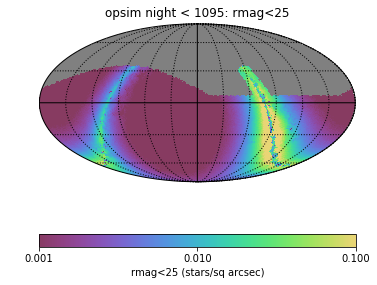

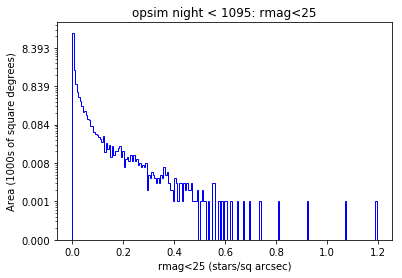

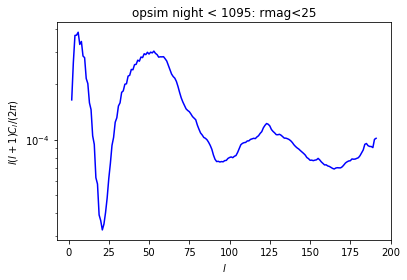

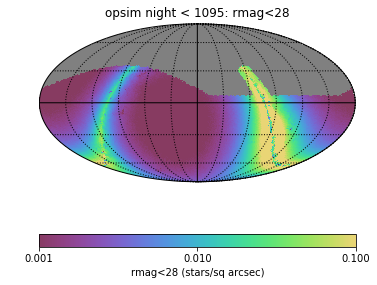

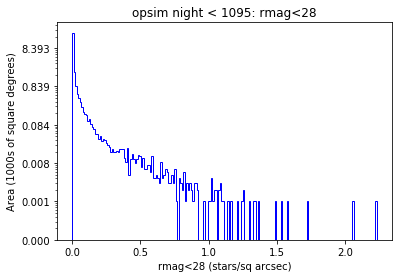

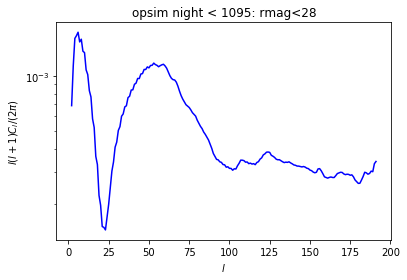

In [4]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

Now try it again with the White Dwarf density maps

In [5]:
bundleList = []
sql = 'night < %i' % (365.25*3) # See How well we do after year 3
slicer = slicers.HealpixSlicer(nside=64, useCache=False)
metric = metrics.StarDensityMetric(metricName='WhiteDwarfs_rmag<25')
mafMap = maps.StellarDensityMap(startype='wdstars')
plotDict = {'colorMin':0.0001, 'colorMax':0.01, 'logScale':True}
bundle = metricBundles.MetricBundle(metric,slicer,sql, mapsList=[mafMap], plotDict=plotDict)
bundleList.append(bundle)

metric = metrics.StarDensityMetric(rmagLimit=27.5,metricName='WhiteDwarfs_rmag<28')
bundle = metricBundles.MetricBundle(metric,slicer,sql, mapsList=[mafMap], plotDict=plotDict)
bundleList.append(bundle)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database SummaryAllProps with constraint night < 1095 for columns ['fieldRA', 'fieldDec']
Found 645219 visits
Running:  ['opsim_WhiteDwarfs_rmaglt25_night_lt_1095_HEAL', 'opsim_WhiteDwarfs_rmaglt28_night_lt_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 1095" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 306 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 3.03538e-05  dipole: lon: -119.195, lat: -38.8782, amp: 2.65248e-05


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 862 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.000220489  dipole: lon: -104.42, lat: -22.0984, amp: 0.000298189
Plotting complete.


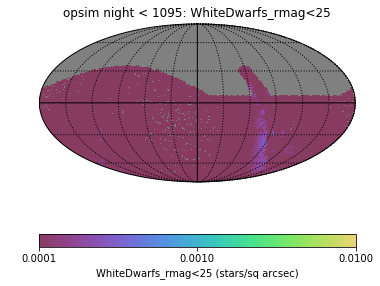

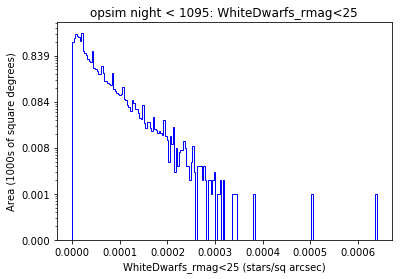

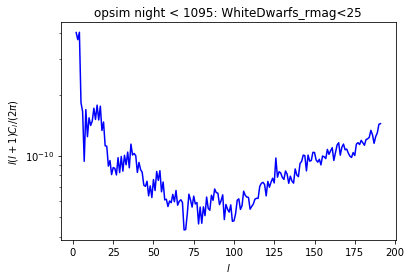

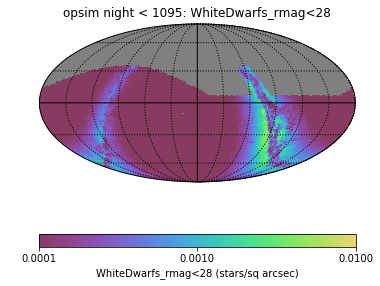

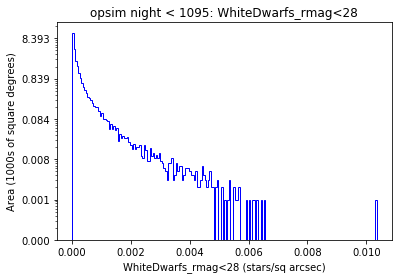

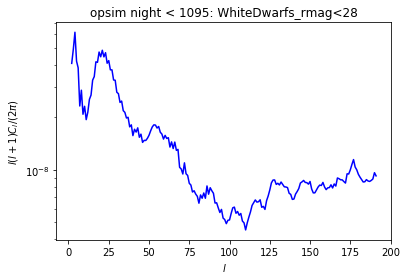

In [6]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

Now to set the maps explicitly to the trilegal maps

In [7]:
bundleList = []
sql = 'night < %i' % (365.25*3) # See How well we do after year 3
slicer = slicers.HealpixSlicer(nside=64, useCache=False)
metric = metrics.StarDensityMetric(metricName='rmag<25', maps=['TrilegalDensityMap'])
# setup the stellar density map to use. By default, all stars in the CatSim catalog are included

plotDict = {'colorMin':0.001, 'colorMax':.1, 'logScale':True}
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict)
bundleList.append(bundle)

metric = metrics.StarDensityMetric(rmagLimit=27.5,metricName='rmag<28', maps=['TrilegalDensityMap'])
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict)
bundleList.append(bundle)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database SummaryAllProps with constraint night < 1095 for columns ['fieldRA', 'fieldDec']
Found 645219 visits
Running:  ['opsim_rmaglt25_night_lt_1095_HEAL', 'opsim_rmaglt28_night_lt_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 1095" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 6946 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.0147988  dipole: lon: -97.6465, lat: -18.5433, amp: 0.025226


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 6122 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.0294075  dipole: lon: -97.8404, lat: -20.1379, amp: 0.0501559
Plotting complete.


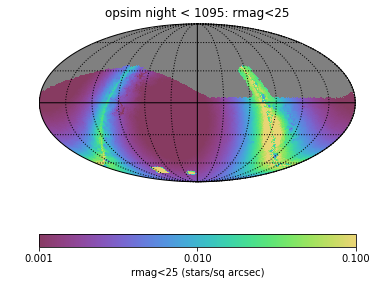

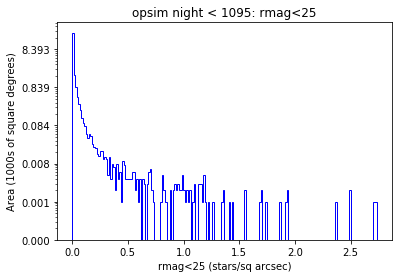

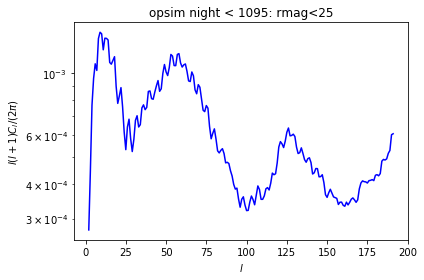

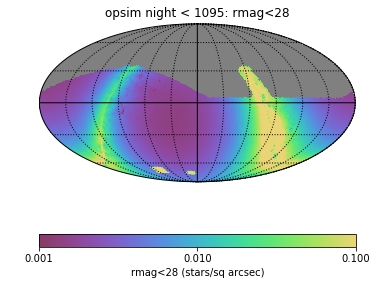

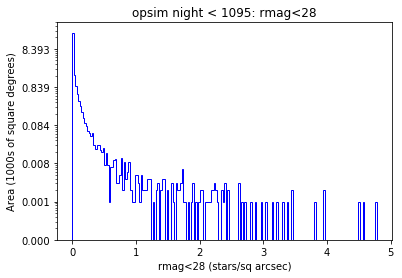

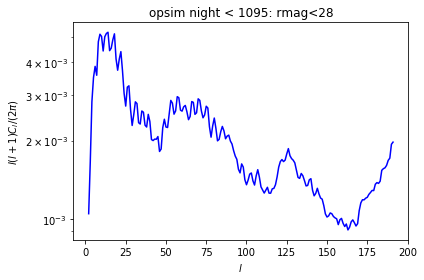

In [8]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)